# Импорт библиотек

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Датасет

In [3]:
df = pd.read_csv('F:/Рабочий стол/EmojiProject/emojis.csv')
df.head()

Group Subgroup CodePoint           Status Representation  \
0  Activities    event     1F383  fully-qualified              🎃   
1  Activities    event     1F384  fully-qualified              🎄   
2  Activities    event     1F386  fully-qualified              🎆   
3  Activities    event     1F387  fully-qualified              🎇   
4  Activities    event     1F9E8  fully-qualified              🧨   

             Name Section  
0  jack-o-lantern    E0.6  
1  Christmas tree    E0.6  
2       fireworks    E0.6  
3        sparkler    E0.6  
4     firecracker   E11.0

In [52]:
df.isna().sum()

Group             0
Subgroup          0
CodePoint         0
Status            0
Representation    0
Name              0
Section           0
Sentiment         0
Name_Length       0
dtype: int64

# Визуализации

In [13]:
plt.rcParams.update({'font.size': 20})

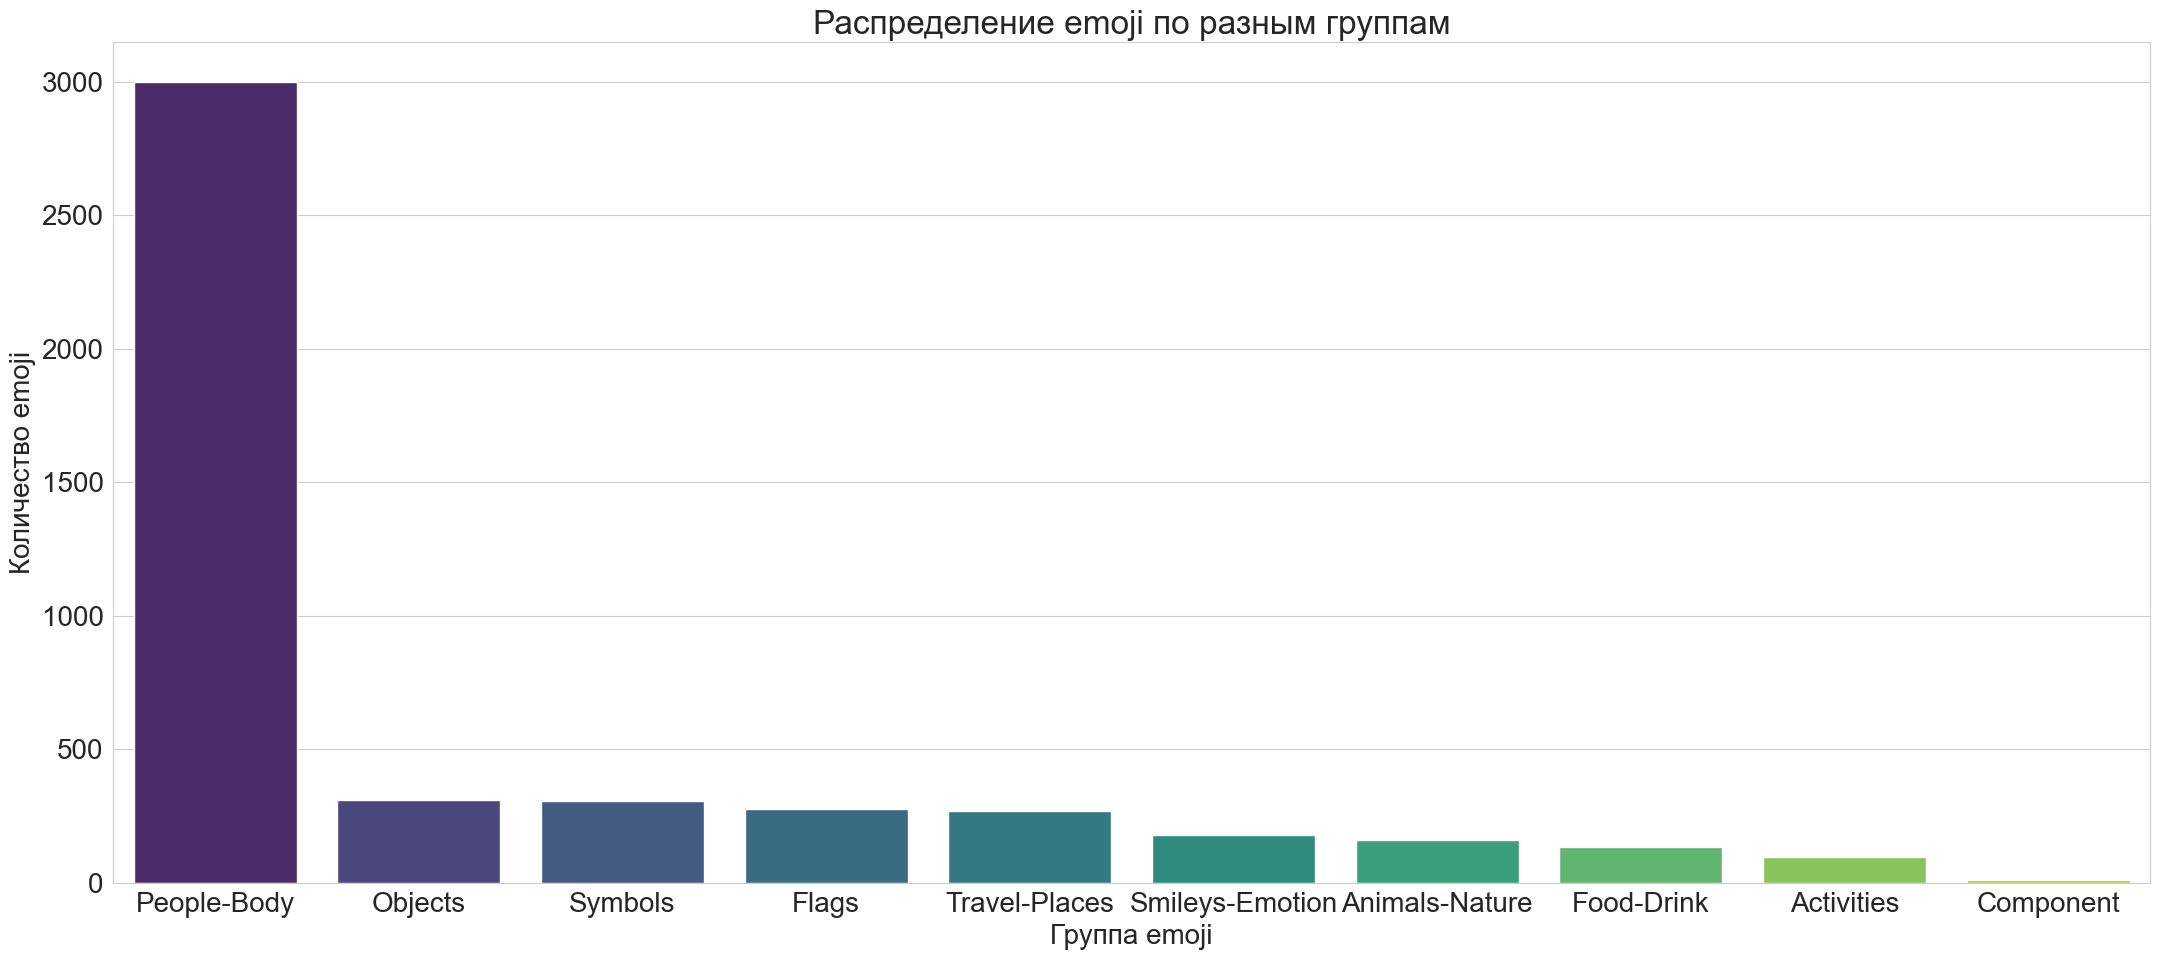

In [16]:
sns.set_style('whitegrid')

plt.figure(figsize = (22, 10))
group_counts = df['Group'].value_counts()
sns.barplot(x = group_counts.index, y = group_counts.values, palette = 'viridis')
plt.title('Распределение emoji по разным группам')
plt.ylabel('Количество emoji')
plt.xlabel('Группа emoji')
plt.tight_layout()
plt.show()

**Данная визуализация показывает распределение эмодзи по различным группам. И в топ 3 входят следующие группы: 'People-Body', 'Objects', 'Symbols'. Причём первая группа выделяется с огромным отрывом.

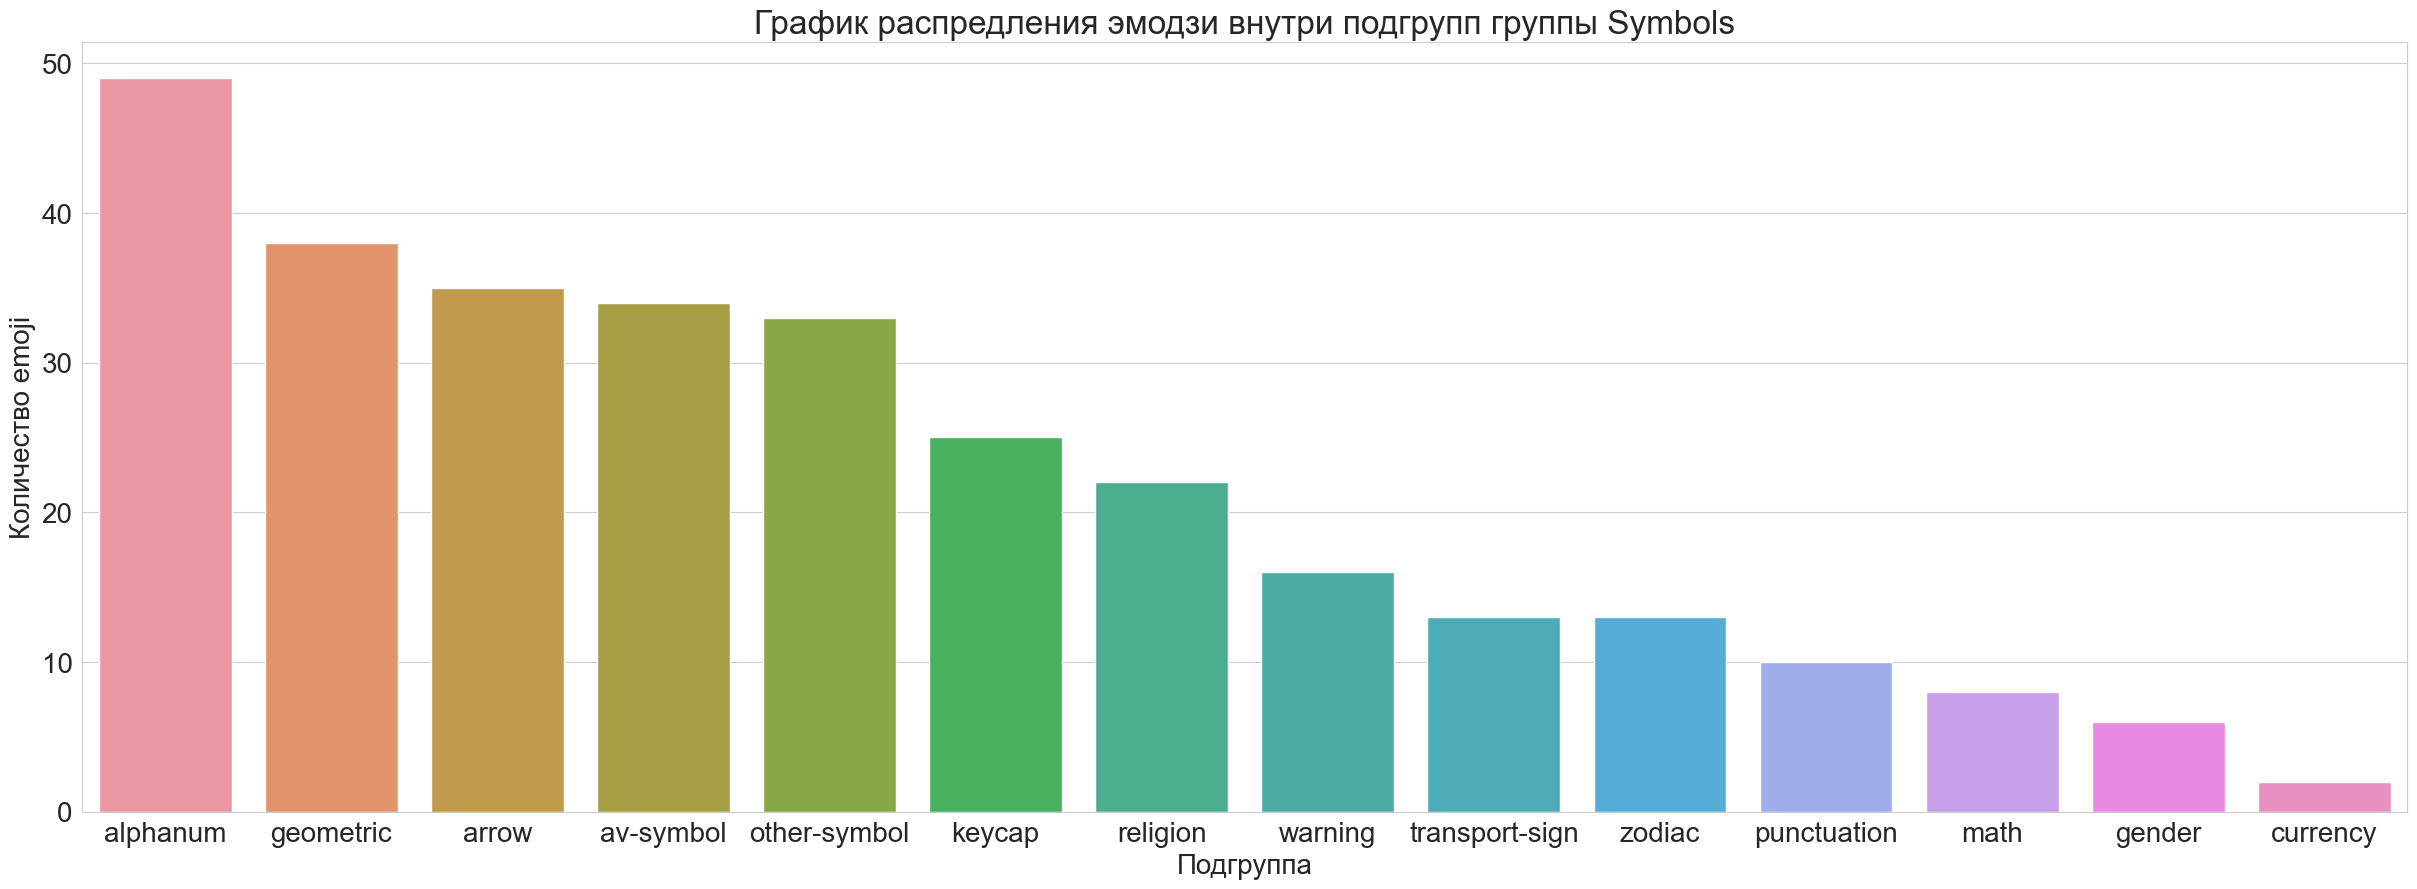

In [21]:
# Отфильтруем все данные в каждой подгруппе для группы 'Symbols'
symbols_subgroup_counts = df[df['Group'] == 'Symbols']['Subgroup'].value_counts()

# Построим график распредления эмодзи внутри подгрупп группы 'Symbols'
plt.figure(figsize = (30,10))
sns.barplot(x = symbols_subgroup_counts.index, y = symbols_subgroup_counts.values)
plt.title('График распредления эмодзи внутри подгрупп группы Symbols')
plt.ylabel('Количество emoji')
plt.xlabel('Подгруппа')
plt.show()

In [24]:
# Проверка уникальных подгрупп в разделе 'Smiles & Emotion'

unique_smileys_subgroups = df[df['Group'] == 'Smileys-Emotion']['Subgroup'].unique()
unique_smileys_subgroups

array(['face-smiling', 'face-affection', 'face-tongue', 'face-hand',
       'face-neutral-skeptical', 'face-sleepy', 'face-unwell', 'face-hat',
       'face-glasses', 'face-concerned', 'face-negative', 'face-costume',
       'cat-face', 'monkey-face', 'heart', 'emotion'], dtype=object)

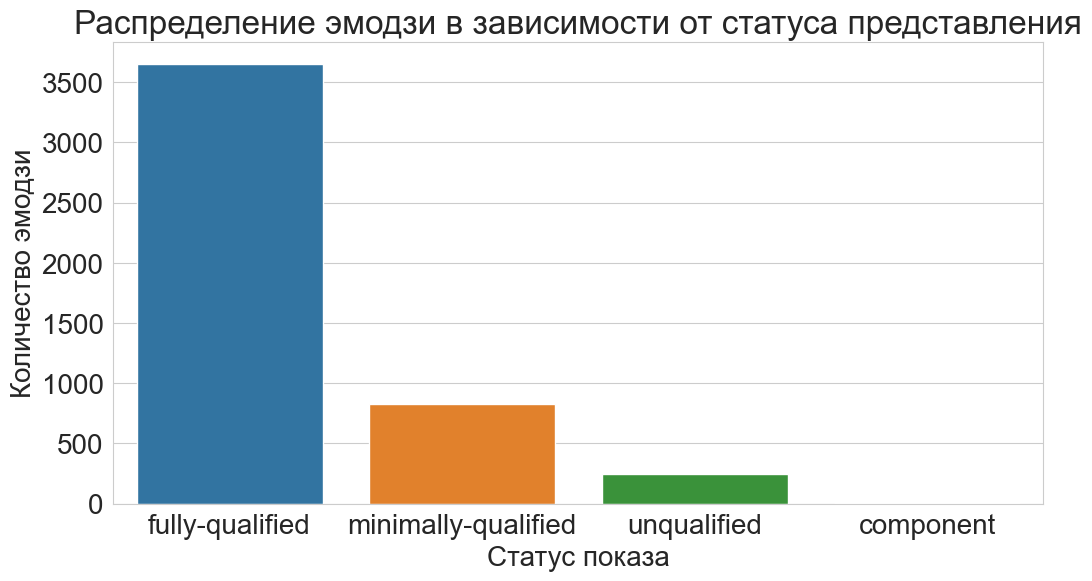

In [26]:
# Количество эмодзи в зависимости от их статуса представления
status_counts = df['Status'].value_counts()
# Построим график распределения эмодзи в зависимости от их статуса представления
plt.figure(figsize = (12,6))
sns.barplot(x = status_counts.index, y = status_counts.values)
plt.title('Распределение эмодзи в зависимости от статуса представления')
plt.ylabel('Количество эмодзи')
plt.xlabel('Статус показа')
plt.show()

**Визуализация показывает распределение эмодзи в зависимости от их статуса представления. Мы можем наблюдать, что большинство эмодзи в наборе данных являются "полностью квалифицированными", меньшее число - "минимально квалифицированными" и еще меньшее число - "неквалифицированными".

In [27]:
# Выберем по 1 эмодзи из каждой группы
sample_emojis = df.groupby('Group').apply(lambda x: x.sample(1)).reset_index(drop = True)
# Отобразим выбранные эмодзи вместе с их названиями и группами
sample_emoji_representation = sample_emojis[['Group', 'Representation', 'Name']]
sample_emoji_representation

Group Representation                                  Name
0       Activities              🏉                        rugby football
1   Animals-Nature            🐈‍⬛                             black cat
2        Component              🏼                medium-light skin tone
3            Flags             🇸🇰                         flag Slovakia
4       Food-Drink              🍻                    clinking beer mugs
5          Objects              📪      closed mailbox with lowered flag
6      People-Body           🤹🏾‍♀  woman juggling medium-dark skin tone
7  Smileys-Emotion              😯                           hushed face
8          Symbols             🅿️                              P button
9    Travel-Places              🕥                            ten-thirty

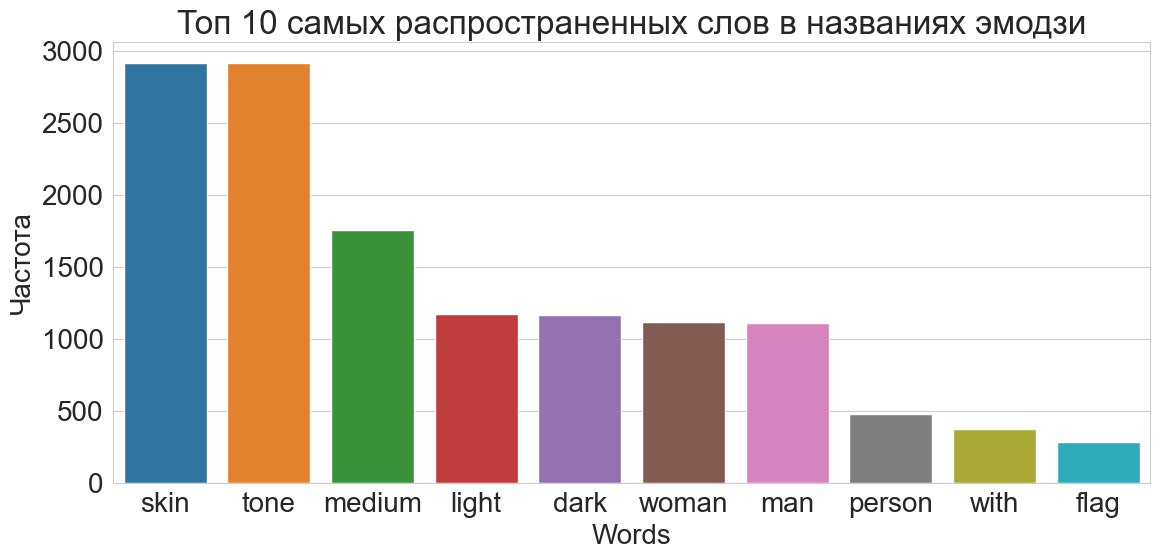

In [28]:
from collections import Counter
import re

#Извлечем слова из столбца 'Name' и посчитаем количество вхождений каждого
words = ' '.join(df['Name']).lower()
word_list = re.findall(r'\w+', words)
word_counts = Counter(word_list)

# Получил топ 10 самых часто встречающихся слов в названиях эмодзи
most_common_words = word_counts.most_common(10)

# Отобразим самые часто встречающиеся слова
plt.figure(figsize = (12,6))
sns.barplot(x = [word[0] for word in most_common_words], y = [word[1] for word in most_common_words])
plt.title('Топ 10 самых распространенных слов в названиях эмодзи')
plt.ylabel('Частота')
plt.xlabel('Words')
plt.tight_layout()
plt.show()

**На диаграмме показаны 10 наиболее часто встречающихся слов в названиях эмодзи. Такие слова, как 'skin' - кожа и 'tone' - тон, выделяются, отражая распространенность эмодзи, представляющих человеческие черты лица, его оттенок кожи и даже гендер. Это подчеркивает важность эмодзи, ориентированных на человека, в наборе данных, подчеркивая человеческий фактор в коммуникации

In [29]:
# Сопоставление основные группы с их соответствующими разделами
group_section_mapping = df.groupby('Group')['Section'].unique()

# Преобразуем в словарь для лучшего отображения
group_section_dict = group_section_mapping.to_dict()
group_section_dict

{'Activities': array(['E0.6', 'E11.0', 'E0.7', 'E1.0', 'E3.0', 'E12.0', 'E5.0', 'E13.0',
        'E14.0'], dtype=object),
 'Animals-Nature': array(['E0.6', 'E3.0', 'E12.0', 'E0.7', 'E11.0', 'E13.0', 'E1.0', 'E15.0',
        'E5.0', 'E14.0'], dtype=object),
 'Component': array(['E1.0', 'E11.0'], dtype=object),
 'Flags': array(['E0.6', 'E1.0', 'E0.7', 'E4.0', 'E13.0', 'E11.0', 'E2.0', 'E5.0'],
       dtype=object),
 'Food-Drink': array(['E0.6', 'E1.0', 'E11.0', 'E13.0', 'E3.0', 'E5.0', 'E0.7', 'E12.0',
        'E14.0', 'E15.0'], dtype=object),
 'Objects': array(['E0.6', 'E0.7', 'E11.0', 'E12.0', 'E5.0', 'E15.0', 'E13.0', 'E1.0',
        'E3.0', 'E14.0'], dtype=object),
 'People-Body': array(['E0.6', 'E1.0', 'E3.0', 'E0.7', 'E14.0', 'E15.0', 'E13.0', 'E12.0',
        'E5.0', 'E11.0', 'E13.1', 'E12.1', 'E4.0', 'E2.0'], dtype=object),
 'Smileys-Emotion': array(['E1.0', 'E0.6', 'E3.0', 'E14.0', 'E11.0', 'E5.0', 'E13.0', 'E0.7',
        'E13.1', 'E15.0', 'E12.0', 'E2.0'], dtype=object),
 'Sym

In [32]:
pip install wordcloud

     -------------------------------------- 152.1/152.1 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


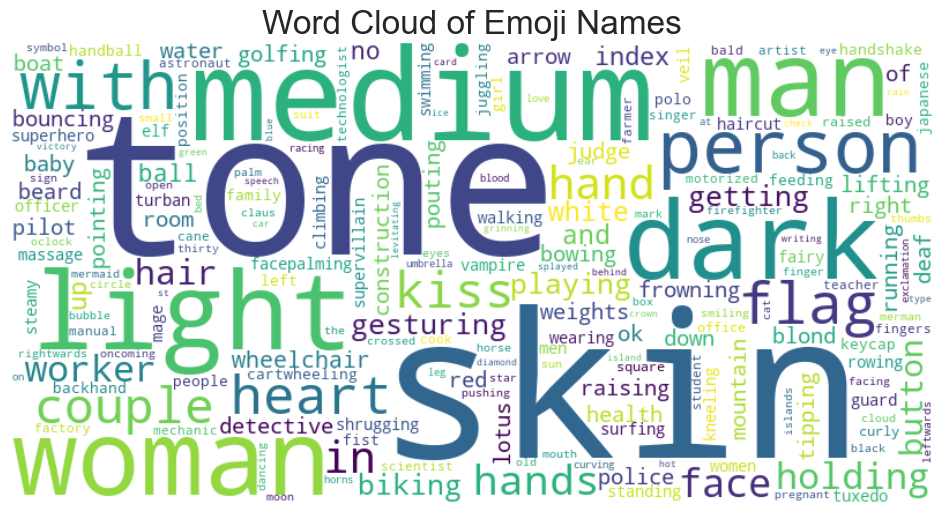

In [33]:
from wordcloud import WordCloud

# Создаим word cloud для названий эмодзи
wordcloud = WordCloud(background_color = 'white', width = 800, height = 400,
                      colormap = 'viridis').generate_from_frequencies(word_counts)
# Отобразим word cloud
plt.figure(figsize = (12,6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud of Emoji Names')
plt.show()

**Word cloud визуально представляет частоту встречаемости слов в названиях эмодзи. Более крупные слова чаще встречаются в наборе данных. Можно заметить, что слова 'tone', 'skin', 'light', 'dark', 'medium' и 'woman' и 'man' доминируют в облаке, подчеркивая преобладание эмодзи, ориентированных на человека

In [34]:
# Выберем по несколько эмодзи из каждого статуса
sample_emojis = df.groupby('Status').apply(lambda x: x.sample(5)).reset_index(drop = True)
# Отобразим выбранные эмодзи вместе с их названиями и статусами
sample_emoji_representation = sample_emojis[['Status', 'Representation', 'Name']]
sample_emoji_representation

Status Representation  \
0             component              🦱   
1             component              🦰   
2             component              🦳   
3             component              🏿   
4             component              🦲   
5       fully-qualified             👇🏽   
6       fully-qualified          🧜🏽‍♂️   
7       fully-qualified              🔕   
8       fully-qualified              🈹   
9       fully-qualified           🧑🏾‍🦰   
10  minimally-qualified           🙋🏻‍♂   
11  minimally-qualified            💁‍♂   
12  minimally-qualified        👩🏾‍❤‍👨🏽   
13  minimally-qualified           🤽🏻‍♂   
14  minimally-qualified           🏄🏼‍♂   
15          unqualified            🏋‍♂   
16          unqualified              ☄   
17          unqualified              ⁉   
18          unqualified              🏙   
19          unqualified              ↔   

                                                 Name  
0                                          curly hair  
1                                            red hair  
2                                          white hair  
3                                      dark skin tone  
4                                                bald  
5       backhand index pointing down medium skin tone  
6                             merman medium skin tone  
7                                     bell with slash  
8                            Japanese discount button  
9               person medium-dark skin tone red hair  
10                   man raising hand light skin tone  
11                                   man tipping hand  
12  couple with heart woman man medium-dark skin t...  
13             man playing water polo light skin tone  
14                 man surfing medium-light skin tone  
15                                man lifting weights  
16                                              comet  
17                          exclamation question mark  
18                                          cityscape  
19                                   left-right arrow

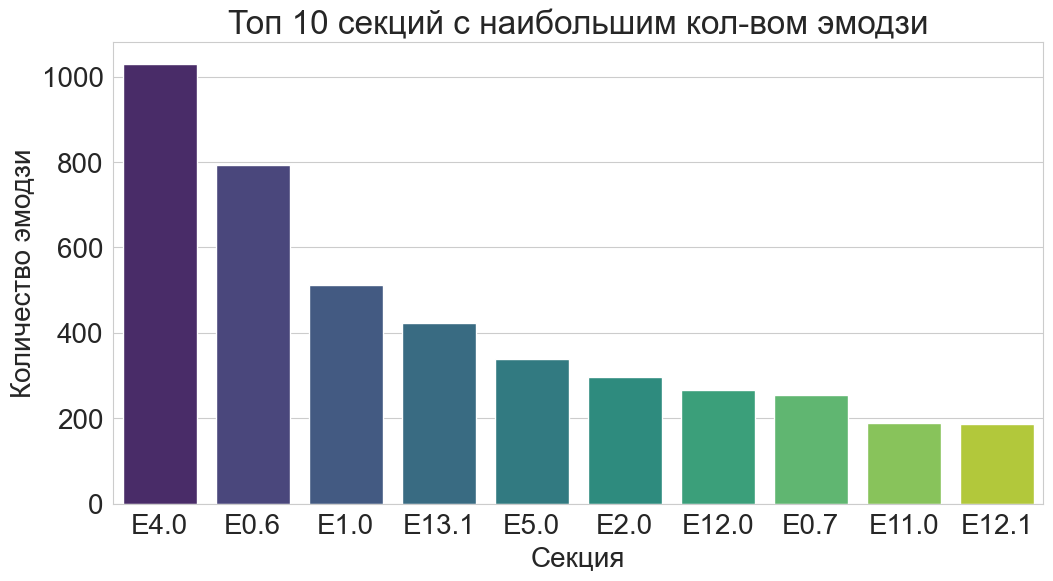

In [35]:
# Количество эмодзи в каждой секции
section_counts = df['Section'].value_counts().head(10)

# Отобразим топ 10 секций с наибольшим количеством эмодзи
plt.figure(figsize =(12,6))
sns.barplot(x = section_counts.index, y = section_counts.values, palette = 'viridis')
plt.title('Топ 10 секций с наибольшим кол-вом эмодзи')
plt.ylabel('Количество эмодзи')
plt.xlabel('Секция')
plt.show()

In [38]:
import plotly.express as px

# Сгруппируем по Group и получим представление эмодзи и количество эмодзи
grouped_data = df.groupby('Group').agg(
    Emoji=('Representation', 'first'),
    Count=('Representation', 'size')
).reset_index()
# Отобразим scatter plot используя Plotly
fig = px.scatter(grouped_data, x = 'Group', y = 'Count',
                 size = 'Count', size_max = 100,
                 hover_name = 'Emoji',
                 text = 'Emoji',
                 title= 'Высокоуровневая визуализация групп эмодзи с всплывающей подсказкой',
                 labels ={'Group': 'Emoji Group', 'Count': 'Number of Emojis'})

# Отрегулировать внешний вид
fig.update_traces(textposition = 'top center', textfont_size = 16)
fig.update_layout(hovermode = 'closest', xaxis_title = '', yaxis_title = 'Number of Emojis')
fig.show()

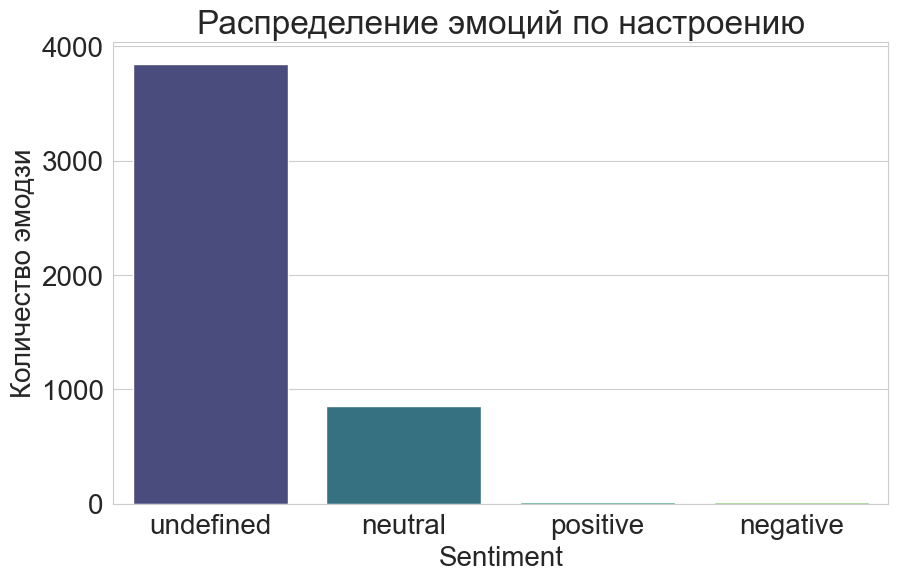

undefined    3849
neutral       853
positive       18
negative       13
Name: Sentiment, dtype: int64

In [43]:
# Определим ключевые слова для положительных, отрицательных и нейтральных 
# настроений

positive_keywords = ['love', 'happy', 'joy', 'smile', 'laugh', 'cheer']
negative_keywords = ['sad', 'angry', 'cry', 'tear', 'hurt', 'pain']
neutral_keywords = ['neutral', 'face', 'eye', 'ear', 'hand']

# Классифицируем эмодзи на основе ключевых слов в их названиях
def categorize_sentiment(name):
    name = name.lower()
    if any(keyword in name for keyword in positive_keywords):
        return 'positive'
    elif any(keyword in name for keyword in negative_keywords):
        return 'negative'
    elif any(keyword in name for keyword in neutral_keywords):
        return 'neutral'
    else:
        return 'undefined'
    
df['Sentiment'] = df['Name'].apply(categorize_sentiment)

# Количество эмодзи в каждом классе настроения
sentiment_counts = df['Sentiment'].value_counts()

# Визуализируем

plt.figure(figsize = (10,6))
sns.barplot(x = sentiment_counts.index, y = sentiment_counts.values, palette = 'viridis')
plt.title('Распределение эмоций по настроению')
plt.ylabel('Количество эмодзи')
plt.xlabel('Sentiment')
plt.show()


sentiment_counts

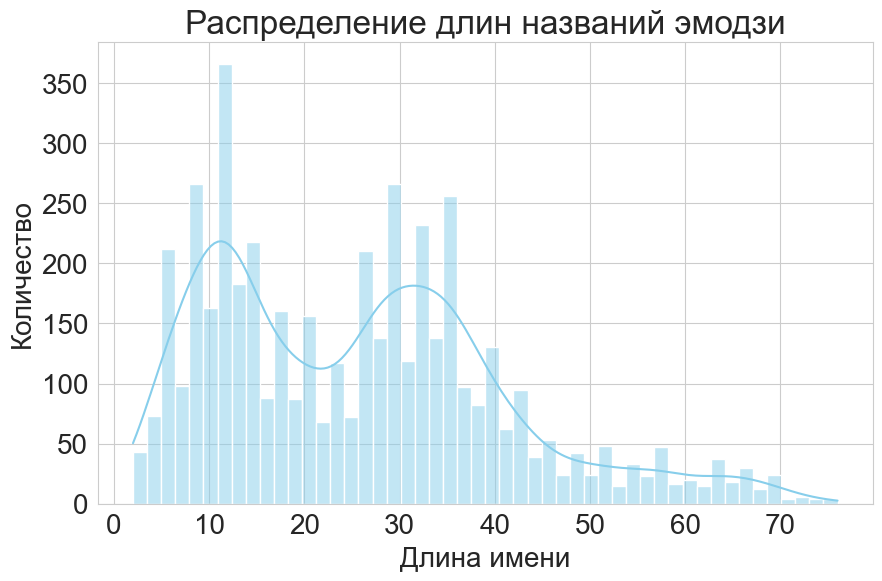

In [53]:
# Вычислим длину каждого имени эмодзи
df['Name_Length'] = df['Name'].apply(len)

# Визуализируем длину имен
plt.figure(figsize = (10,6))
sns.histplot(df['Name_Length'], bins = 50, kde = True, color = 'skyblue')
plt.title('Распределение длин названий эмодзи')
plt.ylabel('Количество')
plt.xlabel('Длина имени')
plt.show()

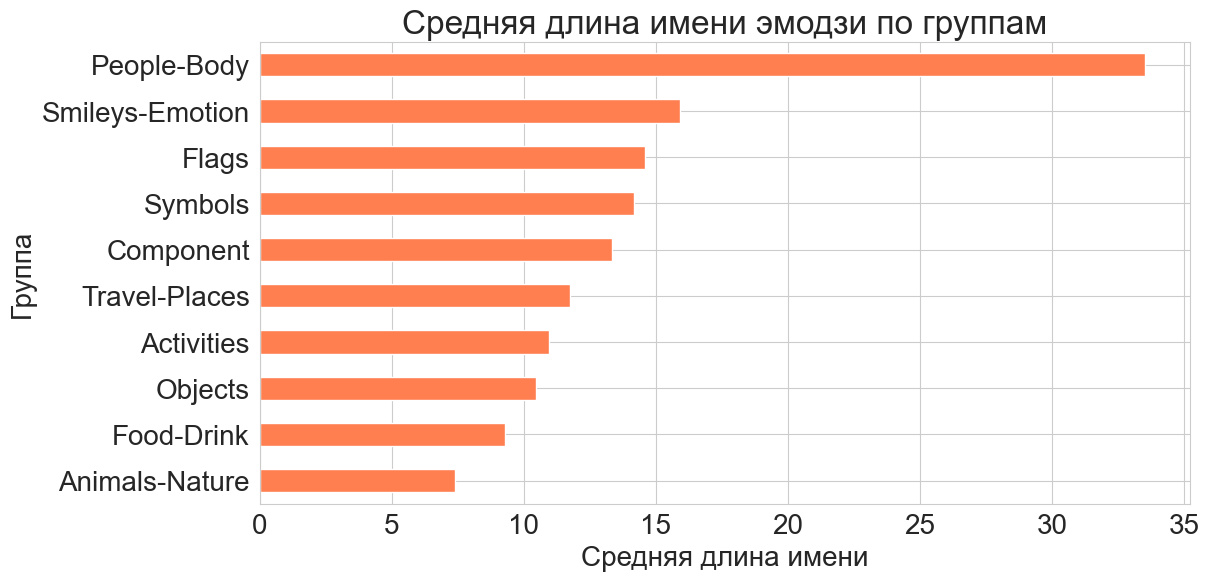

Group
Activities         10.937500
Animals-Nature      7.389937
Component          13.333333
Flags              14.574545
Food-Drink          9.296296
Objects            10.470968
People-Body        33.520680
Smileys-Emotion    15.900000
Symbols            14.184211
Travel-Places      11.741573
Name: Name_Length, dtype: float64

In [51]:
# Вычислим среднюю длину имен для каждой группы
group_avg_name_lengths = df.groupby('Group')['Name_Length'].mean()

# Визуализируем среднее длины имени по группам
plt.figure(figsize = (12,6))
group_avg_name_lengths.sort_values().plot(kind = 'barh', color = 'coral')
plt.title('Средняя длина имени эмодзи по группам')
plt.xlabel('Средняя длина имени')
plt.ylabel('Группа')
plt.show()

group_avg_name_lengths